In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.random import normal, seed
from scipy.stats import norm
from numpy.random import choice

               Open     High      Low       Close   Adj Close     Volume
Date                                                                    
2020-03-18  2478.50  2498.00  2274.75  2414.00000  2414.00000   976536.0
2020-03-19  2414.25  2474.00  2288.00  2403.25000  2403.25000   631228.0
2020-03-20  2364.25  2512.75  2346.25  2437.97998  2437.97998  3075997.0
2020-03-23  2220.25  2386.00  2174.00  2220.50000  2220.50000  3076791.0
2020-03-24  2233.25  2447.75  2230.50  2438.00000  2438.00000  2639522.0
...             ...      ...      ...         ...         ...        ...
2021-03-12  3937.50  3947.50  3910.25  3942.25000  3942.25000  1448886.0
2021-03-15  3945.75  3969.75  3922.25  3967.50000  3967.50000  1448886.0
2021-03-16  3967.00  3980.50  3952.75  3962.50000  3962.50000   887247.0
2021-03-17  3967.50  3983.75  3935.25  3974.00000  3974.00000   887247.0
2021-03-18  3972.00  3988.75  3950.75  3956.00000  3956.00000    56461.0

[253 rows x 6 columns]
Index(['Open', 'High', 'Low

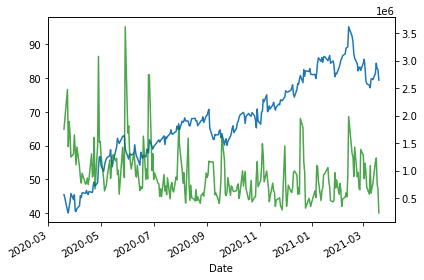

In [2]:
google=pd.read_csv('GOOG.csv',parse_dates=['Date'],index_col='Date')
netflix=pd.read_csv('nflx.csv',parse_dates=['Date'],index_col='Date')
nio=pd.read_csv('nio.csv',parse_dates=['Date'],index_col='Date')
dominos=pd.read_csv('dpz.csv',parse_dates=['Date'],index_col='Date')
disney=pd.read_csv('dis.csv',parse_dates=['Date'],index_col='Date')
apple=pd.read_csv('aapl.csv',parse_dates=['Date'],index_col='Date')
vmware=pd.read_csv('VMW.csv',parse_dates=['Date'],index_col='Date')
microsoft=pd.read_csv('MSFT.csv',parse_dates=['Date'],index_col='Date')
sp500=pd.read_csv('sp500.csv',parse_dates=['Date'],index_col='Date')
cisco=pd.read_csv('CSCO.csv',parse_dates=['Date'],index_col='Date')
tesla=pd.read_csv('TSLA.csv',parse_dates=['Date'],index_col='Date')
cgnx=pd.read_csv('CGNX.csv',parse_dates=['Date'],index_col='Date')

sp500['Open']=sp500['Open'].resample('D').interpolate()

print(sp500)

df=cgnx.copy()

#df['Date']=pd.to_datetime(df['Date'])
#df=df.set_index('Date')
df=df.sort_values(by='Date',ascending=True)
print(df.columns)
fig,ax=plt.subplots(figsize=(6,4))
df['Open'].plot(ax=ax)
twin_ax=ax.twinx()

df['Volume'].plot(ax=twin_ax, c='green', alpha=0.7)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



In [3]:
#df=df.asfreq('B').fillna(0)
#for key, item in df.iterrows():
#    print(key,item)

In [4]:
df['Shifted 1D']=df.Open.shift()
df['Shifted 2D']=df.Open.shift(periods=2)
df['Open_PCT']=df['Open'].pct_change()

df["Buy_Count"]=0

for index in range(len(df)):
    count=0
    for index2 in (range(index,0,-1)):
        if df.iloc[index2]["Open_PCT"]>0:
            count=count+1
        else:
            break
    df.iloc[index, df.columns.get_loc('Buy_Count')]=count
    
df['Action']=[ 'Sell' if x['Buy_Count']==0 else 'Buy' if x['Buy_Count']==2 else 'Hold' if x['Buy_Count'] > 2 else 'No Action' for key,x in df.iterrows()]

df["Target"]=0
for index in range(len(df)):
    action=df.iloc[index]["Action"]
    if (action=='Buy'):
             df.iloc[index, df.columns.get_loc('Target')]=1
    elif (action=='Sell'):
             df.iloc[index, df.columns.get_loc('Target')]=2

print(df[['Target','Action','Open_PCT','Open','Shifted 1D','Shifted 2D','Buy_Count']])



            Target     Action  Open_PCT       Open  Shifted 1D  Shifted 2D  \
Date                                                                         
2020-03-19       2       Sell       NaN  45.490002         NaN         NaN   
2020-03-20       2       Sell -0.022203  44.480000   45.490002         NaN   
2020-03-23       2       Sell -0.083858  40.750000   44.480000   45.490002   
2020-03-24       2       Sell -0.016687  40.070000   40.750000   44.480000   
2020-03-25       0  No Action  0.046419  41.930000   40.070000   40.750000   
...            ...        ...       ...        ...         ...         ...   
2021-03-15       0  No Action  0.022642  81.300003   79.500000   79.739998   
2021-03-16       1        Buy  0.037638  84.360001   81.300003   79.500000   
2021-03-17       2       Sell -0.019203  82.739998   84.360001   81.300003   
2021-03-18       2       Sell -0.003142  82.480003   82.739998   84.360001   
2021-03-19       2       Sell -0.038191  79.330002   82.480003  

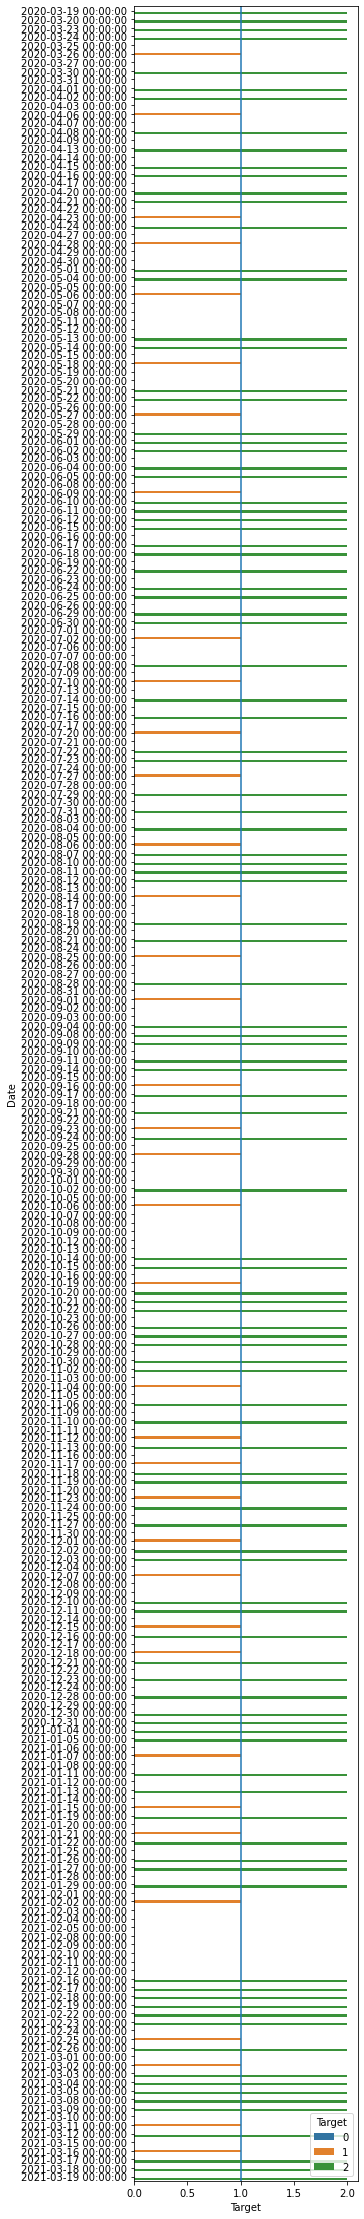

In [5]:
colors=[]
[colors.append('Red') if x=='2' else colors.append('Green') if x==1 else colors.append('White') for x in df['Target']]
plt.figure(figsize=(4, 40))
#names.arg = colors
sns.barplot(data=df, x='Target', y=df.index, hue='Target')
plt.axvline(x=1, ymin=0, ymax=1)
plt.show()

    Buy_Count  Incidence  Size
0           0          2   112
1           1          0    62
2           2          1    37
3           3          0    19
4           4          0    11
5           5          0     4
6           6          0     3
7           7          0     2
8           8          0     1
9           9          0     1
10         10          0     1
Number of Buys in the Data 19
Number of days holding Open          42
High          42
Low           42
Close         42
Adj Close     42
Volume        42
Shifted 1D    42
Shifted 2D    42
Open_PCT      42
Buy_Count     42
Action        42
Target        42
dtype: int64
Incidence shows the average target value for each group


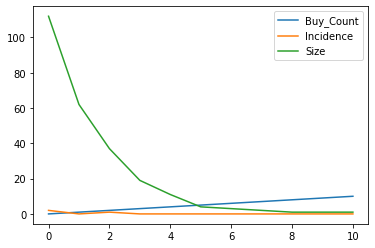

In [6]:
def create_pig_table(basetable, target, variable):
  
    # Create groups for each variable
    groups = basetable[[target,variable]].groupby(variable)
    
    pig_table=groups[target].agg([np.mean, np.size]).reset_index()
    pig_table=pig_table.rename(columns={'mean':'Incidence','size':'Size'})
    #pig_table = groups[target].agg({'Incidence' : np.mean, 'Size' : np.size}).reset_index()

    # Return the predictor insight graph table
    return pig_table

pig_table = create_pig_table(df, "Target", "Buy_Count")
print(pig_table)

print("Number of Buys in the Data", len(df[df['Buy_Count']==3]))

print("Number of days holding", df[(df["Action"]=='Hold')].count())

print("Incidence shows the average target value for each group")

pig_table.plot()
plt.show()

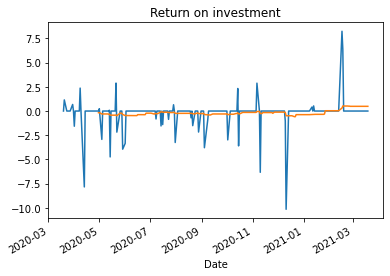

In [7]:
#df['Return']=df[df['Open']]
sellAmt=0
sellIndex=0
buyAmt=0
df['Return']=0
previousAction=""
for index in range(len(df)):
    count=0
    for index2 in (range(index,0,-1)):
        row=df.iloc[index2]
        #Print(row.Action, row.Open, row.Return)
        if row.Action=='Sell':
            if previousAction=='Sell':
                break
            sellAmt=row.Open
            sellIndex=index2
        if row.Action=='Buy' and (previousAction=='Hold' or previousAction=='Sell'):
            #print("Buy", sellIndex,index2)
            buyAmt=row.Open
            #print("Return",  previousAction, buyAmt,sellAmt,index2,sellIndex)
            df.iloc[sellIndex, df.columns.get_loc('Return')]=sellAmt-buyAmt
            break
        if row.Action=='No Action':
            break
        previousAction=row.Action
            
    #df.iloc[index, df.columns.get_loc('Buy_Count')]=count

#for key,item in df.iterrows():
#    print(item.Action,item.Open, "Return", item.Return)


df['Return_Avg'] = df['Return'].rolling(
    window=30,
    center=False
).mean()

df['Return'].plot()
df['Return_Avg'].plot()
plt.title('Return on investment')
plt.show()

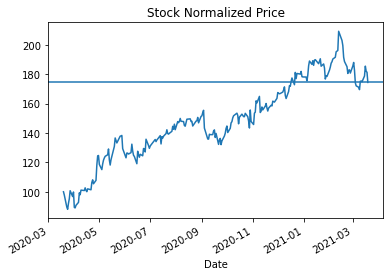

In [8]:
first_price=df['Open'].iloc[0]
last_price=df['Open'].iloc[len(df)-1]/first_price*100

normalized=df.Open.div(first_price).mul(100)
normalized.plot(title='Stock Normalized Price')
plt.axhline(y=last_price, xmin=0, xmax=1)
plt.show()


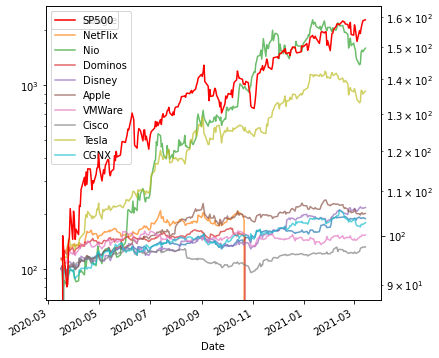

In [9]:
google['Normalized']=google['Open'].div(google['Open'].iloc[0]).mul(100)
microsoft['Normalized']=microsoft['Open'].div(microsoft['Open'].iloc[0]).mul(100)
tesla['Normalized']=tesla['Open'].div(tesla['Open'].iloc[0]).mul(100)
nio['Normalized']=nio['Open'].div(nio['Open'].iloc[0]).mul(100)
netflix['Normalized']=netflix['Open'].div(netflix['Open'].iloc[0]).mul(100)
dominos['Normalized']=dominos['Open'].div(dominos['Open'].iloc[0]).mul(100)
disney['Normalized']=disney['Open'].div(disney['Open'].iloc[0]).mul(100)
apple['Normalized']=apple['Open'].div(apple['Open'].iloc[0]).mul(100)
vmware['Normalized']=vmware['Open'].div(vmware['Open'].iloc[0]).mul(100)
sp500['Normalized']=sp500['Open'].div(sp500['Open'].iloc[0]).mul(100)
cisco['Normalized']=cisco['Open'].div(cisco['Open'].iloc[0]).mul(100)
cgnx['Normalized']=cgnx['Open'].div(cgnx['Open'].iloc[0]).mul(100)


compare=google.merge(microsoft['Normalized'],on='Date',how='left').rename(columns={'Normalized_x':'Google','Normalized_y':'Microsoft'}).drop(columns=['Volume','High','Low','Close','Adj Close']).fillna(0)
compare=compare.merge(netflix['Normalized'],on='Date',how='left').rename(columns={'Normalized':'NetFlix'}).fillna(0)
compare=compare.merge(nio['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Nio'}).fillna(0)
compare=compare.merge(tesla['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Tesla'}).fillna(0)
compare=compare.merge(dominos['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Dominos'}).fillna(0)
compare=compare.merge(disney['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Disney'}).fillna(0)
compare=compare.merge(apple['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Apple'}).fillna(0)
compare=compare.merge(vmware['Normalized'],on='Date',how='left').rename(columns={'Normalized':'VMWare'}).fillna(0)
compare=compare.merge(sp500['Normalized'],on='Date',how='left').rename(columns={'Normalized':'SP500'}).fillna(0)
compare=compare.merge(cisco['Normalized'],on='Date',how='left').rename(columns={'Normalized':'Cisco'}).fillna(0)
compare=compare.merge(cgnx['Normalized'],on='Date',how='left').rename(columns={'Normalized':'CGNX'}).fillna(0)

#print(compare)



#compare=compare.div(compare.iloc[0]).mul(100)

tickers=['Google','NetFlix','Nio','Dominos','Disney','Apple','VMWare','Cisco','Tesla','CGNX']
#tickers=['Nio','Tesla']
#print(compare)
fig,ax=plt.subplots(figsize=(6,6))
plt.yscale("log")
compare[tickers].plot(ax=ax,alpha=.7)
twin_ax=ax.twinx()
compare[['SP500']].plot(ax=twin_ax, c='red')
plt.yscale("log")
plt.show()


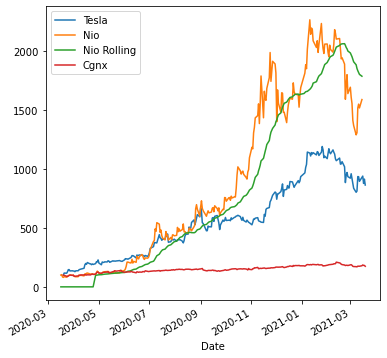

In [10]:
#print(compare)
nio_rolling_30=nio.rolling(window=30).mean()

fig,ax=plt.subplots(figsize=(6,6))
tesla['Normalized'].plot(ax=ax)
nio['Normalized'].plot(ax=ax)
nio_rolling_30['Normalized'].fillna(0).plot(ax=ax)

cgnx['Normalized'].plot(ax=ax)
plt.legend(['Tesla','Nio','Nio Rolling','Cgnx'])
plt.show()


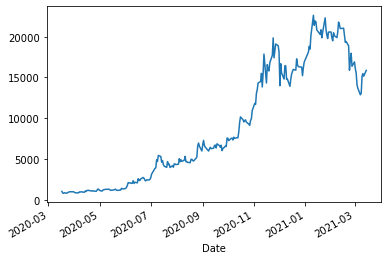

In [11]:
investment=1000
returns=nio['Open'].pct_change()

returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot()
plt.show()

Simulate the sp500


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


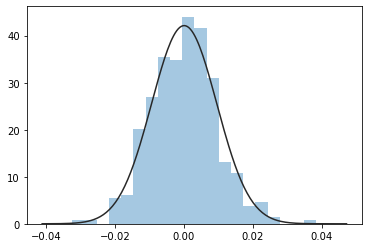

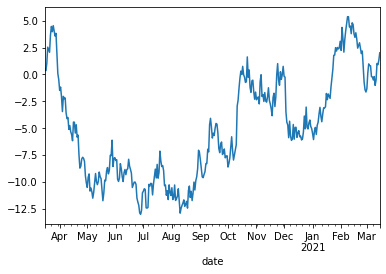

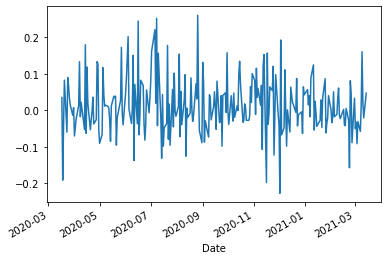

The sp500 does the fit the normal distribution well having more outliers


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


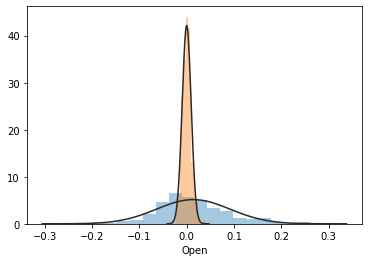

In [14]:
print("Simulate the sp500")

seed(42)

#obj=sp500
obj=nio
dates=pd.date_range(start=obj.index.min(), end=obj.index.max(),freq='D')

random_returns= normal(loc=0, scale=.01, size=len(dates))
sns.distplot(random_returns, fit=norm, kde=False)
plt.show()

#print(len(dates),len(random_returns))
return_df=pd.DataFrame({'date':dates,'prices':random_returns})
return_df=return_df.set_index('date')
#print(return_df)

random_prices=return_df.prices.add(1).cumprod().sub(1)
random_prices.mul(100).plot()
plt.show()

returns_obj=obj['Open'].pct_change()
returns_obj.plot()
plt.show()

sns.distplot(returns_obj, fit=norm, kde=False)
sns.distplot(random_returns, fit=norm, kde=False)
print("The sp500 does the fit the normal distribution well having more outliers")

randomly sample from data
Date
2020-03-18    2478.500000
2020-03-17       1.013629
2020-03-18       0.910970
2020-03-19       0.901145
2020-03-20       0.963516
dtype: float64


<AxesSubplot:xlabel='Date'>

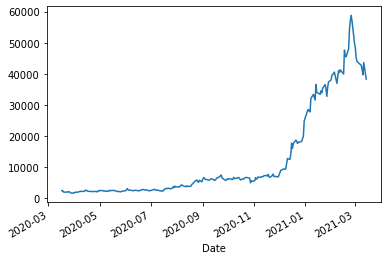

In [15]:
print ('randomly sample from data')
sample=returns_obj.dropna()
n_obs= returns_obj.count()
random_walk = choice(sample, size=n_obs)

random_walk = pd.Series(random_walk, index=sample.index)
#random_walk.head()

start = sp500['Open'].first('D')

sp500_random = start.append(random_walk.add(1))
print(sp500_random.head())

sp500_random= sp500_random.cumprod()
sp500_random.plot()